In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("air_quality_no2_long.csv", parse_dates=True)

df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [4]:
df = df.rename(columns={"date.utc": "datetime"})

In [5]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [6]:
df["datetime"].min(), df["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [7]:
df["datetime"].max() - df["datetime"].min()

Timedelta('44 days 23:00:00')

In [8]:
df.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [9]:
df["month"] = df["datetime"].dt.month
df

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5


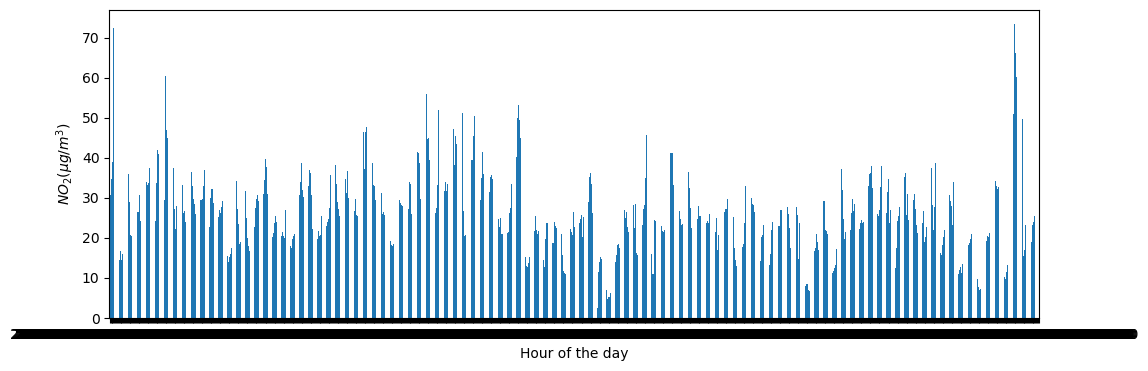

In [10]:

fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["datetime"])["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");  # custom x label using Matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");

In [12]:
no_2 = df.pivot(index="datetime", columns="location", values="value")

no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [13]:
no_2.index.year, no_2.index.weekday

(Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        ...
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
       dtype='int32', name='datetime', length=1033),
 Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        ...
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       dtype='int32', name='datetime', length=1033))

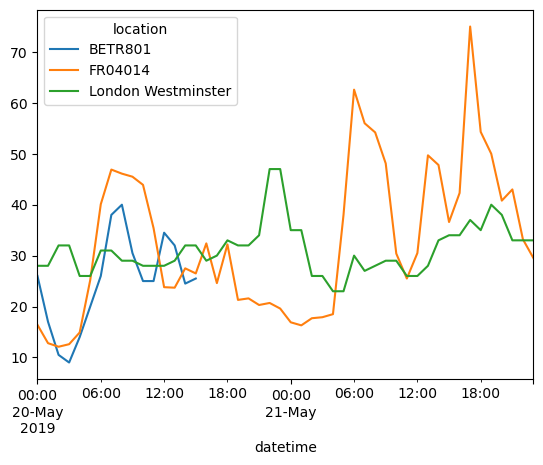

In [14]:
no_2["2019-05-20":"2019-05-21"].plot();

In [ ]:
monthly_max = no_2.resample("ME").max()